### HOG IDENTIFICATION OF CAPTCHA

In [106]:
img = skimage.io.imread("dados/CAPTCHA-10k/treinamento/000002.jpg")
print(img.shape)

(50, 180, 3)


(128, 64)


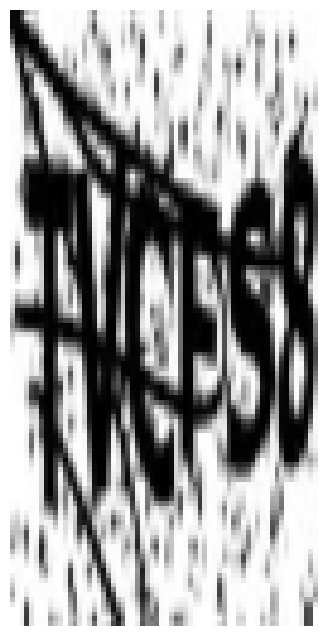

In [107]:
img = skimage.color.rgb2gray(img)
img = skimage.transform.resize(img, (128 ,64))
print(img.shape)
plt.figure(figsize=(15, 8))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [108]:
mag = []
theta = []
for i in range(128):
  magnitudeArray = []
  angleArray = []
  for j in range(64):
    # Condition for axis 0
    if j-1 <= 0 or j+1 >= 64:
      if j-1 <= 0:
        # Condition if first element
        Gx = img[i][j+1] - 0
      elif j + 1 >= len(img[0]):
        Gx = 0 - img[i][j-1]
    # Condition for first element
    else:
      Gx = img[i][j+1] - img[i][j-1]
    
    # Condition for axis 1
    if i-1 <= 0 or i+1 >= 128:
      if i-1 <= 0:
        Gy = 0 - img[i+1][j]
      elif i +1 >= 128:
        Gy = img[i-1][j] - 0
    else:
      Gy = img[i-1][j] - img[i+1][j]

    # Calculating magnitude
    magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
    magnitudeArray.append(round(magnitude, 9))

    # Calculating angle
    if Gx == 0:
      angle = math.degrees(0.0)
    else:
      angle = math.degrees(abs(math.atan(Gy / Gx)))
    angleArray.append(round(angle, 9))
  mag.append(magnitudeArray)
  theta.append(angleArray)

mag = np.array(mag)
theta = np.array(theta)

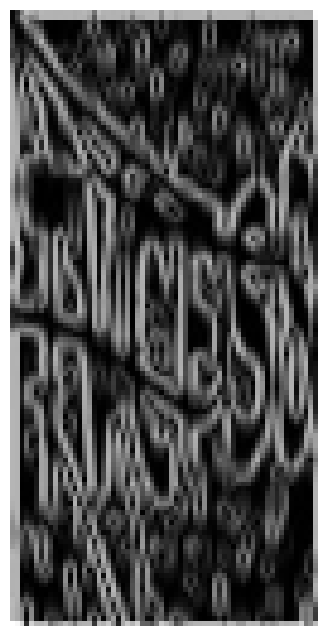

In [162]:
plt.figure(figsize=(15, 8))
plt.imshow(mag, cmap="gray")
plt.axis("off")
plt.show()

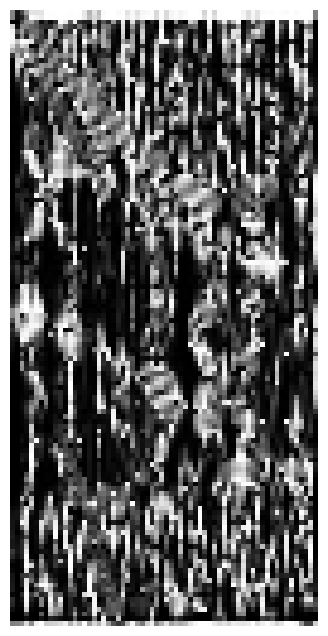

In [161]:
plt.figure(figsize=(15, 8))
plt.imshow(theta, cmap="gray")
plt.axis("off")
plt.show()

In [111]:
number_of_bins = 9 
step_size = 180 / number_of_bins

def calculate_j(angle):
  temp = (angle / step_size) - 0.5
  j = math.floor(temp)
  return j

def calculate_Cj(j):
  Cj = step_size * (j + 0.5)
  return round(Cj, 9)

def calculate_value_j(magnitude, angle, j):
  Cj = calculate_Cj(j+1)
  Vj = magnitude * ((Cj - angle) / step_size)
  return round(Vj, 9)

In [112]:

histogram_points_nine = []
for i in range(0, 128, 8):
  temp = []
  for j in range(0, 64, 8):
    magnitude_values = [[mag[i][x] for x in range(j, j+8)] for i in range(i,i+8)]
    angle_values = [[theta[i][x] for x in range(j, j+8)] for i in range(i, i+8)]
    for k in range(len(magnitude_values)):
      for l in range(len(magnitude_values[0])):
        bins = [0.0 for _ in range(number_of_bins)]
        value_j = calculate_j(angle_values[k][l])
        Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
        Vj_1 = magnitude_values[k][l] - Vj
        bins[value_j]+=Vj
        bins[value_j+1]+=Vj_1
        bins = [round(x, 9) for x in bins]
    temp.append(bins)
  histogram_points_nine.append(temp)

In [113]:

print(len(histogram_points_nine))
print(len(histogram_points_nine[0]))
print(len(histogram_points_nine[0][0]))

16
8
9


In [114]:
epsilon = 1e-05
feature_vectors = []
for i in range(0, len(histogram_points_nine) - 1, 1):
  temp = []
  for j in range(0, len(histogram_points_nine[0]) - 1, 1):
    values = [[histogram_points_nine[i][x] for x in range(j, j+2)] for i in range(i, i+2)]
    final_vector = []
    for k in values:
      for l in k:
        for m in l:
          final_vector.append(m)
    k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
    final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
    temp.append(final_vector)
  feature_vectors.append(temp)

print(len(feature_vectors))
print(len(feature_vectors[0]))
print(len(feature_vectors[0][0]))


15
7
36


In [115]:
print(f'Number of HOG features = {len(feature_vectors) * len(feature_vectors[0]) * len(feature_vectors[0][0])}')

Number of HOG features = 3780


In [165]:
import cv2
def extract_hog_features(img):
  #img = skimage.color.rgb2gray(img)
  image = skimage.io.imread(img)
  image = skimage.transform.resize(image, (128 ,64))
    
  mag = []
  theta = []
  for i in range(128):
    magnitudeArray = []
    angleArray = []
    for j in range(64):
      # Condition for axis 0
      if j-1 <= 0 or j+1 >= 64:
        if j-1 <= 0:
          # Condition if first element
          Gx = image[i][j+1] - 0
        elif j + 1 >= len(image[0]):
          Gx = 0 - image[i][j-1]
      # Condition for first element
      else:
        Gx = image[i][j+1] - image[i][j-1]
      
      # Condition for axis 1
      if i-1 <= 0 or i+1 >= 128:
        if i-1 <= 0:
          Gy = 0 - image[i+1][j]
        elif i +1 >= 128:
          Gy = image[i-1][j] - 0
      else:
        Gy = image[i-1][j] - image[i+1][j]

      # Calculating magnitude
      magnitude = np.sqrt(np.power(Gx, 2) + np.power(Gy, 2))
      magnitudeArray.append(np.round(magnitude, 9))

      # Calculating angle
      if np.all(Gx == 0):
        angle = np.degrees(0.0)
      else:
        angle = np.degrees(np.abs(np.arctan2(Gy,Gx)))
      angleArray.append(np.round(angle, 9))
    mag.append(magnitudeArray)
    theta.append(angleArray)

  mag = np.array(mag)
  theta = np.array(theta)

  number_of_bins = 9 
  step_size = 180 / number_of_bins

  def calculate_j(angle):
    temp = (angle / step_size) - 0.5
    j = math.floor(temp)
    return j

  def calculate_Cj(j):
    Cj = step_size * (j + 0.5)
    return round(Cj, 9)

  def calculate_value_j(magnitude, angle, j):
    Cj = calculate_Cj(j+1)
    Vj = magnitude * ((Cj - angle) / step_size)
    return round(Vj, 9)
  

  histogram_points_nine = []
  for i in range(0, 128, 8):
    temp = []
    for j in range(0, 64, 8):
      magnitude_values = [[mag[i][x] for x in range(j, j+8)] for i in range(i,i+8)]
      angle_values = [[theta[i][x] for x in range(j, j+8)] for i in range(i, i+8)]
      for k in range(len(magnitude_values)):
        for l in range(len(magnitude_values[0])):
          bins = [0.0 for _ in range(number_of_bins)]
          value_j = calculate_j(angle_values[k][l])
          Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
          Vj_1 = magnitude_values[k][l] - Vj
          bins[value_j]+=Vj
          bins[value_j+1]+=Vj_1
          bins = [round(x, 9) for x in bins]
      temp.append(bins)
    histogram_points_nine.append(temp)

  epsilon = 1e-05
  feature_vectors = []

  for i in range(0, len(histogram_points_nine) - 1, 1):
    temp = []
    for j in range(0, len(histogram_points_nine[0]) - 1, 1):
      values = [[histogram_points_nine[i][x] for x in range(j, j+2)] for i in range(i, i+2)]
      final_vector = []
      for k in values:
        for l in k:
          for m in l:
            final_vector.append(m)
      k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
      final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
      temp.append(final_vector)
    feature_vectors.append(temp)
  return feature_vectors  

In [166]:
import os


train_folder = "dados/CAPTCHA-10k/treinamento/"
test_folder = "dados/CAPTCHA-10k/teste/"
validation_folder = "dados/CAPTCHA-10k/validacao/"
labels = "dados/CAPTCHA-10k/labels10k/"

labels = os.listdir(labels)

hog_features = []
hog_labels = []

for filename in os.listdir(train_folder):
    image_path = os.path.join(train_folder, filename)
    features = extract_hog_features(image_path)
    hog_features.append(features)
    index = int(filename.split(".")[0]) - 1
    hog_labels.append(labels[index])

for filename in os.listdir(test_folder):
    image_path = os.path.join(test_folder, filename)
    features = extract_hog_features(image_path)

for filename in os.listdir(validation_folder):
    image_path = os.path.join(validation_folder, filename)
    features = extract_hog_features(image_path)

hog_features = np.array(hog_features)
hog_labels = np.array(hog_labels)

TypeError: only length-1 arrays can be converted to Python scalars

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Example classifier, you can choose a different one
from sklearn.metrics import accuracy_scor

labels = 

X = feature_vectors
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classifier = SVC(kernel='linear', C=1, gamma='auto')

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, y_pred)}')

SyntaxError: invalid syntax (2471606821.py, line 5)

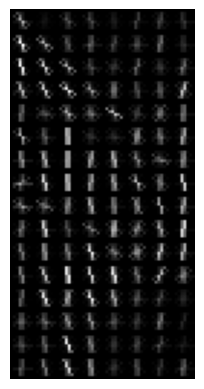

In [117]:
from skimage.feature import hog

fd, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.axis("off")
plt.imshow(hog_img, cmap="gray")
plt.show()